# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



# Data Pre-Processing:

In [58]:
# Common library imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.preprocessing import StandardScaler

In [59]:
# Data pre-processing
## We base our pre-processing on the raw alldata.xlsx information, which includes a complete overview of all the responses associated with each candidate and party affiliation.
raw_data = pd.read_excel('alldata.xlsx')

## Display the head of the raw data, for visual inspection:
display(raw_data.head())

## Since it is a requirement that each party have a specific color, I create a dictionary here, with these colors defined:
party_colors = {
    "Socialdemokratiet": "#b32722",
    "Radikale Venstre": "#713280",
    "Det Konservative Folkeparti": "#9eba27",
    "Nye Borgerlige": "#054f5c",
    "Socialistisk Folkeparti": "#dd0878",
    "Liberal Alliance": "#21c6cf",
    "Kristendemokraterne": "#bababa",
    "Moderaterne": "#6c39e5",
    "Dansk Folkeparti": "#f3cd41",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "#00e66a",
    "Venstre": "#006697",
    "Danmarksdemokraterne": "#8ac3ff",
    "Enhedslisten": "#ed8019",
    "Alternativet": "#2a8f39",
    "Løsgænger": "#8c564b"
}

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58


# Data Analysis: Age of Candidates grouped by party


Age stats grouped by party:


,count,min,max,mean,std,mode,25%,50%,75%
parti,,,,,,,,,
Alternativet,65.0,21.0,79.0,47.415385,13.620862,50,39.00,48.0,58.00
Danmarksdemokraterne,37.0,24.0,69.0,51.216216,10.252737,40,45.00,53.0,59.00
Dansk Folkeparti,49.0,20.0,75.0,45.530612,12.191360,42,39.00,47.0,54.00
Det Konservative Folkeparti,94.0,20.0,66.0,44.723404,11.904101,53,37.00,48.0,53.00
Enhedslisten,71.0,19.0,74.0,42.225352,15.193229,35,31.00,41.0,53.50
"Frie Grønne, Danmarks Nye Venstrefløjsparti",26.0,20.0,62.0,34.807692,10.777826,26,27.50,33.0,37.50
Kristendemokraterne,41.0,21.0,73.0,50.219512,13.441563,47,43.00,50.0,61.00
Liberal Alliance,68.0,18.0,72.0,37.970588,13.736291,32,26.00,37.0,46.00
Løsgænger,3.0,40.0,58.0,48.000000,9.165151,40,43.00,46.0,52.00



Age distribution visualized


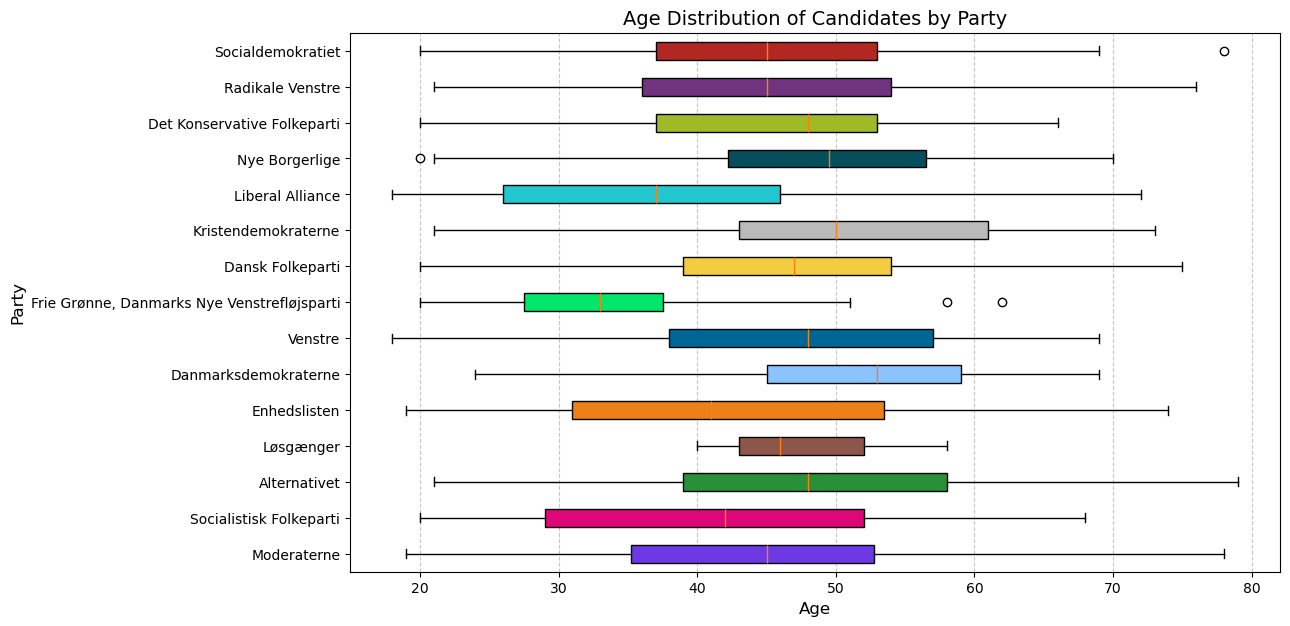

In [60]:
# Data analysis: Age of Candidates grouped by party

## Extract the relevant columns, these being party affiliation and candidate age.
age_data = raw_data[['parti', 'alder']]
#display(age_data)
# 867 entries found

## Note: Some candidates have not given their age! These should (must be) excluded from the data set to avoid skewing the data.
## Thus we need to clean up the data. We remove candidates that have not given their age (ages set to 0)
age_data_cleaned = age_data.loc[age_data['alder'] != 0]
# display(age_data_cleaned)
# 851 entries remaining.

## We now begin our analysis of the candidates grouped by party.
## We are interested in analysing for each party what are the: Max age, Min Age, Median/Average Age, Standard age deviation, age medians across quartiles of the dataset (25%, 50%, 75%) and the most frequently occurring (mode) age.
age_data_cleaned_groupedByParty = age_data_cleaned.groupby(['parti'])

## Compute the mean, std, min., max., 25%, 50% and 75% quartiles.
age_data_stats = age_data_cleaned_groupedByParty['alder'].describe()

## Calculate the mode values:
mode_values = age_data_cleaned_groupedByParty['alder'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_values = mode_values.rename("mode")
age_data_stats = age_data_stats.join(mode_values)

## Arrange the columns in my preferred order: number_of_candidates, min. age, max. age, mean age, standard age deviation, age mode and data for each quartile.
column_order = ['count', 'min', 'max', 'mean', 'std', 'mode', '25%', '50%', '75%']
age_data_stats = age_data_stats[column_order]

print("\nAge stats grouped by party:")
display(age_data_stats)

print("\nAge distribution visualized")
parties = age_data_cleaned['parti'].unique()
data = [age_data_cleaned.loc[age_data_cleaned['parti'] == party, 'alder'] for party in parties]

plt.figure(figsize=(12, 7))
box = plt.boxplot(data, vert=False, patch_artist=True, tick_labels=parties)

for patch, label in zip(box['boxes'], parties):
    color = party_colors.get(label, "#7f7f7f")
    patch.set_facecolor(color)

plt.xlabel("Age", fontsize=12)
plt.ylabel("Party", fontsize=12)
plt.title("Age Distribution of Candidates by Party", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


The above data analysis highlights a few peculiar facts about the different parties. Below I discuss a few observations.

### Youngest vs. Oldest party.
The party for the youngsters is 'Frie Grønne, Danmarks Nye Venstrefløjsparti', with a mean age pr. candidate of 35 and a standard-deviation of 10. Meaning most candidates affiliated with this party are between 25 and 45 years old. Liberal Alliance is another party with relative young candidates. Their average age is slightly higher at 38, but their standard deviation is also slightly higher at ca. 14, meaning most candidates in this party age between 24 and 52 years old. So while 'Frie Grønne' is "mostly for the youngest candidates", Liberal Alliance seems to have managed to grab the attention of the younger candidates, while still maintaining a presence amongst the slightly more mature.

The party for the elderly is Danmarksdemokraterne, with a mean age pr. candidate of ca. 51. This party also maintains the highest minimum candidate age at 24. Additionally the bulk of Danmarksdemokraternes candidates are amongst the oldest candidates on the list, with 50% percent of their candidates being aged between 45 and 59 years of age.

### Party with the largest deviation in age
The party with the largest mean deviation between their candidates is enhedslisten, with a standard deviation of ca. 15 years. This could point towards Enhedslisten having some success in maintaining interest amongst the broadest spectrum of candidates (and perhaps voters), when looking at age.

# Data Analysis: Candidate Confidence

In [61]:
# We start by working on the raw data set. We add a column used to count the number of occurrences of either 'strongly agree' or 'strongly disagree', so we have something to filter and sort after
candidate_confidence_data = raw_data
candidate_confidence_data['confidence'] = candidate_confidence_data.apply(lambda row: sum(1 for value in row if value in {-2, 2}), axis=1)
print("Display added confidence info, for visual inspection:")
display(candidate_confidence_data.head())

# We can now filter the data set, leaving only the confidence column along columns containing the candidate names, 'storkreds' and party affiliations
candidate_confidence_data_filtered = raw_data[['navn', 'parti', 'storkreds', 'confidence']]

# Lets display the 20 candidates with the highest levels of confidence:
#candidate_confidence_data_filtered = candidate_confidence_data_filtered.sort_values(by='confidence', ascending=False, inplace=True)
with pd.option_context('display.max_rows', 20):
    display(candidate_confidence_data_filtered.sort_values(by='confidence', ascending=False).head(20))

Display added confidence info, for visual inspection:


,530,531,533,534,535,537,538,540,541,543,...,9b,10a,10b,11a,11b,12a,12b,storkreds,alder,confidence
0,-1,-2,1,-2,2,1,-2,1,1,2,...,0,1,-2,-2,1,1,1,Københavns Storkreds,78,25
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,0,-1,2,1,-2,0,0,Fyns Storkreds,64,25
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37,22
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28,33
4,1,1,-2,2,-2,1,-2,1,2,-2,...,0,-1,0,-2,0,2,-2,Københavns Storkreds,58,31


,navn,parti,storkreds,confidence
505,Sarah Nørris,Enhedslisten,Sydjyllands Storkreds,49
88,Søren Vanting,Det Konservative Folkeparti,Østjyllands Storkreds,49
559,Kim Andkjær Doberck,Nye Borgerlige,Sydjyllands Storkreds,44
152,Rashid Ali,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Københavns Storkreds,43
44,Mohamed Abdikarim,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Østjyllands Storkreds,43
503,Jan Filbært,Enhedslisten,Sydjyllands Storkreds,42
151,Elise Bjerkrheim,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Københavns Storkreds,42
284,John Bjerg,Nye Borgerlige,Nordjyllands Storkreds,42
437,Lone Vase Langballe,Dansk Folkeparti,Vestjyllands Storkreds,42
359,Frank Sørensen,Dansk Folkeparti,Fyns Storkreds,42


### Comment:
Sarah Nørris (Ø) and Søren Vanting (C) are tied as the most confidant candidates. Amongst the top 20 we also find that 12/20 of the candidates are from Jutland, while the remainders are divided between Sjælland and Fyn. A peculiar observation, considering that the population on Sjælland is larger than Jutland.

# Data Analysis: Candidate response differences inter-party and intra-party
For the intra-party candidate differences I approach this task by separating the candidate responses by party affiliation.
Next I plot, for each question, the variation in responses for all party affiliated candidates in a box plot.
This approach will allow for rapid overview over how the candidates in each party have answered each question, and if there are any questions with significant outliers.


Candidate Responses visualized


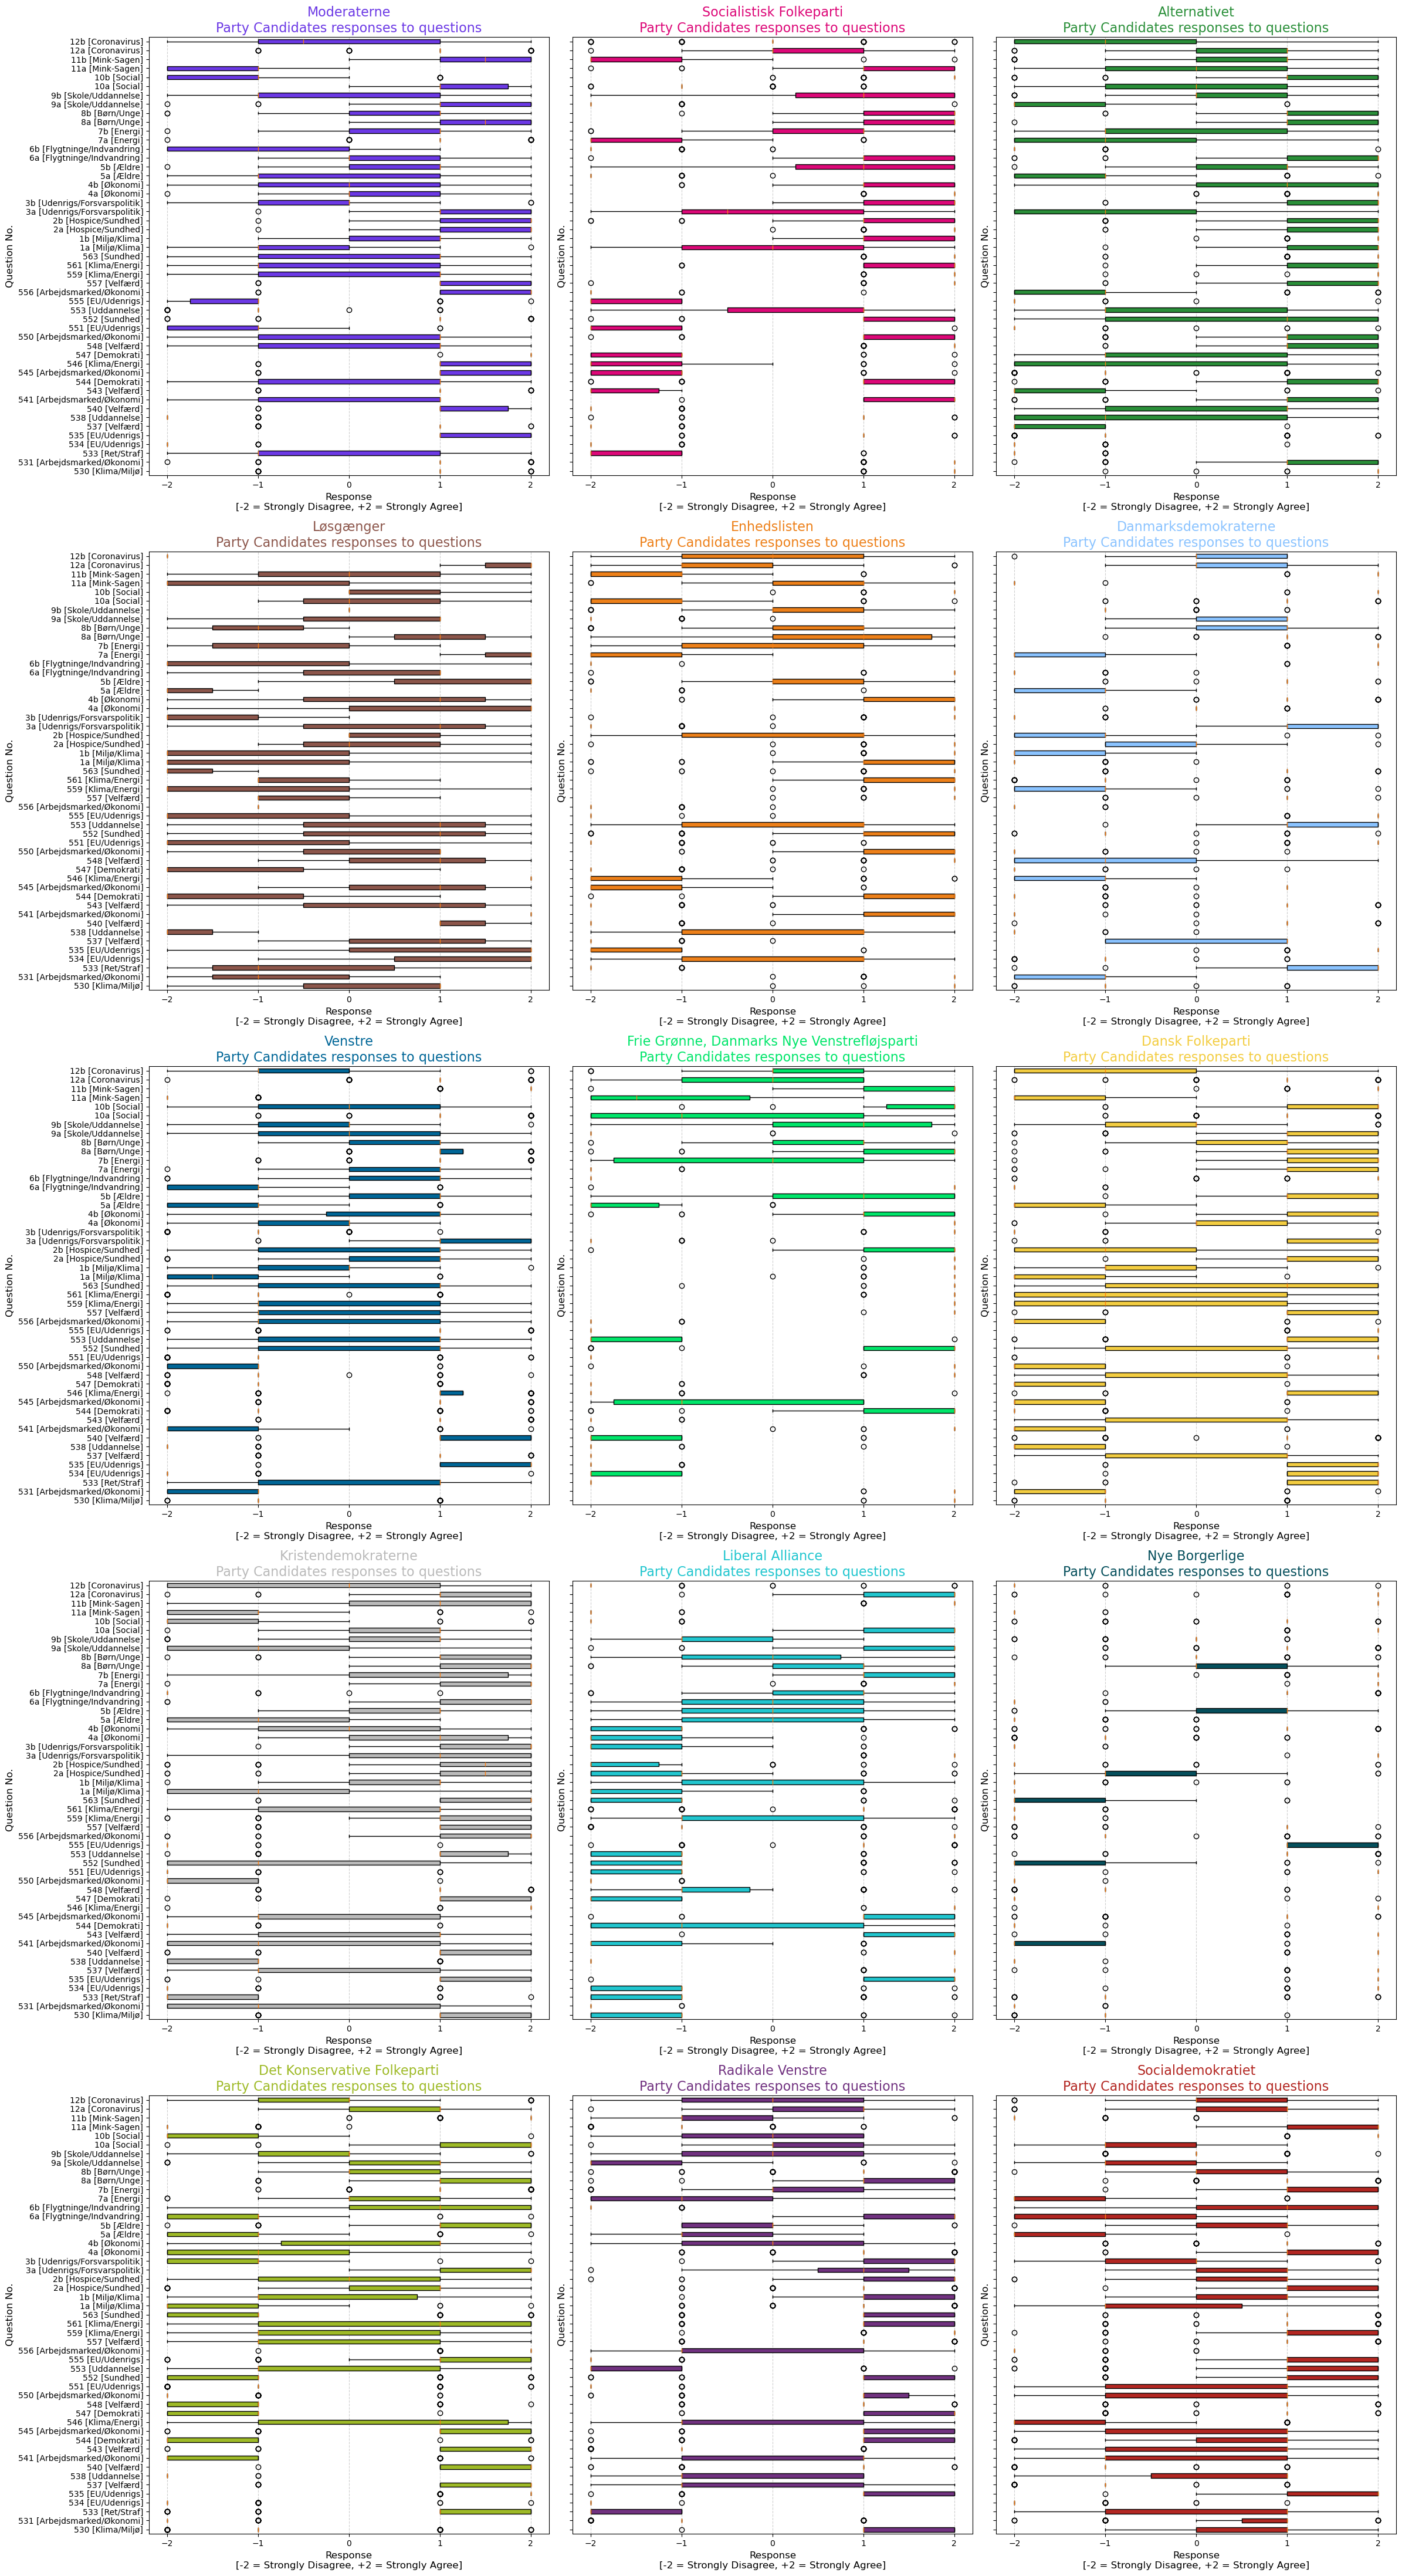

In [81]:
# Let's first prepare the data:
intra_party_response_data = raw_data
intra_party_response_data = intra_party_response_data.drop(columns=['storkreds', 'alder', 'navn', 'confidence'])

# Group the question answers by party and compute statistics:
intra_party_response_data_grouped_by_party = intra_party_response_data.groupby(['parti']).describe()

question_columns = ['530', '531', '533', '534', '535', '537', '538', '540', '541', '543', '544', '545', '546', '547', '548', '550', '551',
                    '552', '553', '555', '556', '557', '559', '561', '563', '1a', '1b', '2a', '2b', '3a', '3b', '4a', '4b', '5a', '5b',
                    '6a', '6b', '7a', '7b', '8a', '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b']

question_labels = ['530 [Klima/Miljø]', '531 [Arbejdsmarked/Økonomi]', '533 [Ret/Straf]', '534 [EU/Udenrigs]', '535 [EU/Udenrigs]', '537 [Velfærd]', '538 [Uddannelse]', '540 [Velfærd]',
                   '541 [Arbejdsmarked/Økonomi]', '543 [Velfærd]', '544 [Demokrati]', '545 [Arbejdsmarked/Økonomi]', '546 [Klima/Energi]', '547 [Demokrati]', '548 [Velfærd]',
                   '550 [Arbejdsmarked/Økonomi]', '551 [EU/Udenrigs]', '552 [Sundhed]', '553 [Uddannelse]', '555 [EU/Udenrigs]', '556 [Arbejdsmarked/Økonomi]', '557 [Velfærd]',
                   '559 [Klima/Energi]', '561 [Klima/Energi]', '563 [Sundhed]', '1a [Miljø/Klima]', '1b [Miljø/Klima]', '2a [Hospice/Sundhed]', '2b [Hospice/Sundhed]',
                   '3a [Udenrigs/Forsvarspolitik]', '3b [Udenrigs/Forsvarspolitik]', '4a [Økonomi]', '4b [Økonomi]', '5a [Ældre]', '5b [Ældre]', '6a [Flygtninge/Indvandring]',
                   '6b [Flygtninge/Indvandring]', '7a [Energi]', '7b [Energi]', '8a [Børn/Unge]', '8b [Børn/Unge]', '9a [Skole/Uddannelse]', '9b [Skole/Uddannelse]', '10a [Social]',
                   '10b [Social]', '11a [Mink-Sagen]', '11b [Mink-Sagen]', '12a [Coronavirus]', '12b [Coronavirus]']

# Create multiple subplots for easy visual comparison between parties
print("\nCandidate Responses visualized")
fig, axes = plt.subplots(5, 3, figsize=(28, 44), sharey=True)
axes = axes.flatten()

parties = intra_party_response_data['parti'].unique()

def plot_box(ax, values, party, _party_color):
    box = ax.boxplot(values, vert=False, patch_artist=True)
    for patch in box['boxes']:
        patch.set_facecolor(party_color)
        patch.set_edgecolor("black")
    ax.set_yticks(ticks=range(1, len(question_columns) + 1,), labels=question_labels, fontsize=10)
    ax.set_xticks(range(-2, 3))
    ax.set_title(f"{party}\nParty Candidates responses to questions", color=_party_color, fontsize=16)
    ax.set_xlabel("Response\n[-2 = Strongly Disagree, +2 = Strongly Agree]", fontsize=12)
    ax.set_ylabel("Question No.", fontsize=12)
    ax.grid(axis="x", linestyle="--", alpha=0.6)

i = 0
for party in parties:
    party_color = party_colors.get(party, "#7f7f7f")
    filtered_data = intra_party_response_data[intra_party_response_data['parti'] == party]
    data = [filtered_data[col].dropna().tolist() for col in question_columns]
    plot_box(axes[i], data, party, party_color)
    i += 1

plt.tight_layout()
plt.show()

### Comment
The data analysis and visualization of the intra-party responses presented above show that certain parties are quite aligned in their political standpoints across the board, while others are quite split.

Looking at the parties with <b>least</b> intra-party disagreements, we must visually identify the parties presented where as many as possible of the 'boxes' are either exactly 1 response wide or varies between 2 response categories.

- Nye Borgerlige takes the lead as least internal disagreements. Most of their candidates answers are generally aligned with each other, with slight variances for the bulk (50%) of their candidates on 7 questions.

Looking at the parties with the <b>most</b> intra-party disagreements, we must identify the parties with the least responses that are identical, or where the boxes on the plots are as wide as possible over many responses.

- Løsgængere is not a political party, so it shouldn't surprise as this is where the most disagreement is found. With mostly identical answers for only 4 of the questions and large variations in the other responses, this is the group with the most disagreements.
- Kristendemokraterne is the political party with the most internal disagreement. The bulk (50%) of their candidates only agree fully on 7 questions, with large deviations across the board on the remaining questions.

## Interparty variations:
To evaluate

# Machine Learning: Decision Tree, Random Forest & Gradient Boosted Tree models to predict Candidate party affiliation

In [31]:
# Insert code